## 기본 모델 만들어 예측과 평가하기
* IBM sample datasets
https://www.kaggle.com/blastchar/telco-customer-churn

* Demographic info: 
    * Gender, SeniorCitizen, Partner, Dependents
* Services subscribed: 
    * PhoneService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
* Customer account info:
    * CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure

In [1]:
# 필요한 라이브러리 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 시각화 retina 설정 
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

## 데이터 로드하기

In [3]:
# telco.csv

df = pd.read_csv('data/telco.csv')
df.shape

(7043, 21)

In [4]:
## customerID 로 인덱스 설정하기
df = df.set_index("customerID")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# head 로 미리보기
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# info 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

## 전처리

In [7]:
# TotalCharges 수치 데이터로 변경하기

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")

In [8]:
# 결측치를 채워주는 방법도 있지만 일단 제거하도록 합니다.

df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# Churn 빈도수 보기

df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

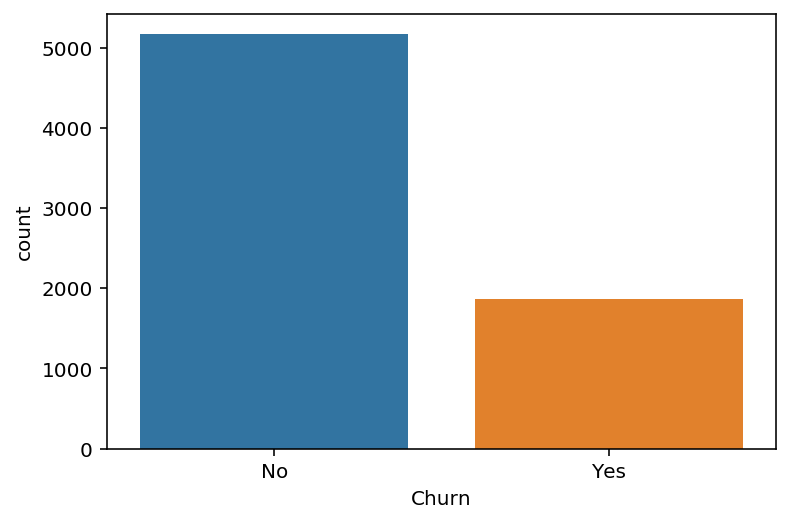

In [12]:
sns.countplot(data=df, x="Churn")

In [14]:
# Churn 을 bool 타입으로 만들기
df["Churn_bool"] = (df["Churn"] == "Yes")

In [15]:
df[["Churn", "Churn_bool"]].head()

,Churn,Churn_bool
customerID,,
7590-VHVEG,No,False
5575-GNVDE,No,False
3668-QPYBK,Yes,True
7795-CFOCW,No,False
9237-HQITU,Yes,True


In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_bool
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,False
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,False
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,True
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,False
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,True


In [17]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Churn_bool'],
      dtype='object')

## 학습, 예측 데이터셋 나누기
### 학습, 예측에 사용할 컬럼

In [18]:
# feature_names 만들기

feature_names = ["SeniorCitizen", "tenure", 'MonthlyCharges', 'TotalCharges']

### 정답값이자 예측해야 될 값

In [19]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.
label_name = "Churn_bool"

### 문제(feature)와 답안(label)을 나누기

* X, y를 만들어 줍니다.
* X는 feature, 독립변수, 예) 시험의 문제
* y는 label, 종속변수, 예) 시험의 정답

In [21]:
# X, y를 만들어 줍니다.
X = df[feature_names]
y = df[label_name]

### 학습, 예측 데이터셋 만들기
* X_train : 학습 세트 만들기, 행렬, 판다스의 데이터프레임, 2차원 리스트(배열) 구조,  예) 시험의 기출문제
* y_train : 정답 값을 만들기, 벡터, 판다스의 시리즈, 1차원 리스트(배열) 구조, 예) 기출문제의 정답
* X_test : 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제
* y_test : 예측의 정답값 예) 실전 시험 문제의 정답

In [22]:
# slice 로 나누기 위해 데이터를 나눌 기준 인덱스 구하기
# split_count 라는 변수에 담습니다.

split_count = int((X.shape[0]) * 0.8)
split_count

5625

In [23]:
# slicing으로 train, test 세트 나누기

X_train = X[:split_count]
X_test = X[split_count:]

In [24]:
# X_train 미리보기
X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
customerID,,,,
7590-VHVEG,0,1,29.85,29.85
5575-GNVDE,0,34,56.95,1889.50
3668-QPYBK,0,2,53.85,108.15
7795-CFOCW,0,45,42.30,1840.75
9237-HQITU,0,2,70.70,151.65
...,...,...,...,...
5028-HTLJB,1,1,20.05,20.05
9801-GDWGV,0,39,103.45,3994.45
6542-LWGXJ,0,3,25.00,78.25


In [25]:
# X_test 미리보기

X_test

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
customerID,,,,
2320-JRSDE,0,1,19.90,19.90
2087-QAREY,0,22,54.70,1178.75
0601-WZHJF,0,14,46.35,667.70
4423-JWZJN,0,64,90.25,5629.15
5143-WMWOG,0,1,19.95,19.95
...,...,...,...,...
6840-RESVB,0,24,84.80,1990.50
2234-XADUH,0,72,103.20,7362.90
4801-JZAZL,0,11,29.60,346.45


In [26]:
# 정답 데이터 나누기
y_train = y[:split_count]
y_test = y[split_count:]

## 머신러닝 모델로 예측하기

In [30]:
# 트리모델 로드하기

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [31]:
# 학습하기
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [32]:
# 예측하기

y_pred = model.predict(X_test)

## 모델 평가하기

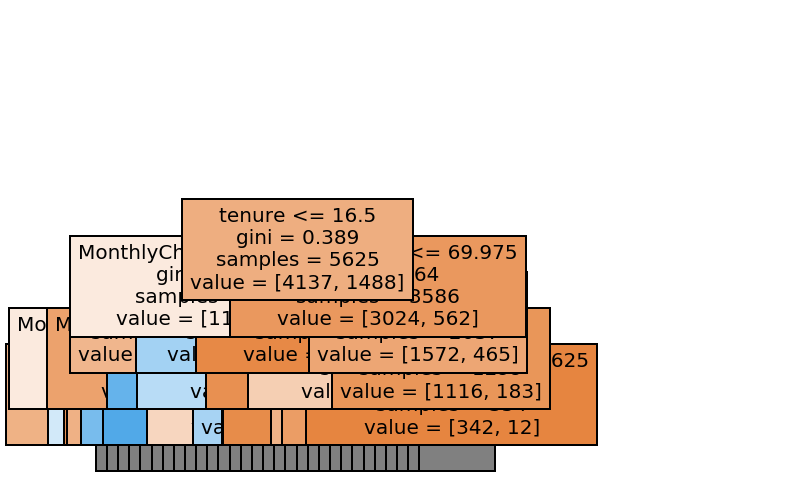

In [35]:
# plot_tree 를 통해 tree 를 그려봅니다.

from sklearn.tree import plot_tree

tree_viz = plot_tree(model,
                    feature_names=feature_names,
                    filled=True,
                    max_depth=4,
                    fontsize=10)

In [36]:
# export_text 를 통해 text 로 트리를 그립니다.
# 너무길면 보기가 어렵기 때문에 max_depth 를 설정해 주면 특정 깊이까지만 보입니다.

from sklearn.tree import export_text
r = export_text(model, max_depth=4, feature_names=feature_names)
print(r)

|--- tenure <= 16.50
|   |--- MonthlyCharges <= 69.22
|   |   |--- tenure <= 2.50
|   |   |   |--- MonthlyCharges <= 20.85
|   |   |   |   |--- TotalCharges <= 20.27
|   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |--- TotalCharges >  20.27
|   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |--- MonthlyCharges >  20.85
|   |   |   |   |--- SeniorCitizen <= 0.50
|   |   |   |   |   |--- truncated branch of depth 17
|   |   |   |   |--- SeniorCitizen >  0.50
|   |   |   |   |   |--- truncated branch of depth 9
|   |   |--- tenure >  2.50
|   |   |   |--- MonthlyCharges <= 27.43
|   |   |   |   |--- TotalCharges <= 60.20
|   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |--- TotalCharges >  60.20
|   |   |   |   |   |--- truncated branch of depth 20
|   |   |   |--- MonthlyCharges >  27.43
|   |   |   |   |--- TotalCharges <= 332.47
|   |   |   |   |   |--- truncated branch of depth 26
|   |   |   |   |--- TotalCharges >  332.47
|   |

In [37]:
# feature_importances_ 를 통해 모델의 피처 중요도를 추출하기

model.feature_importances_

array([0.02282356, 0.24419135, 0.39498781, 0.33799728])

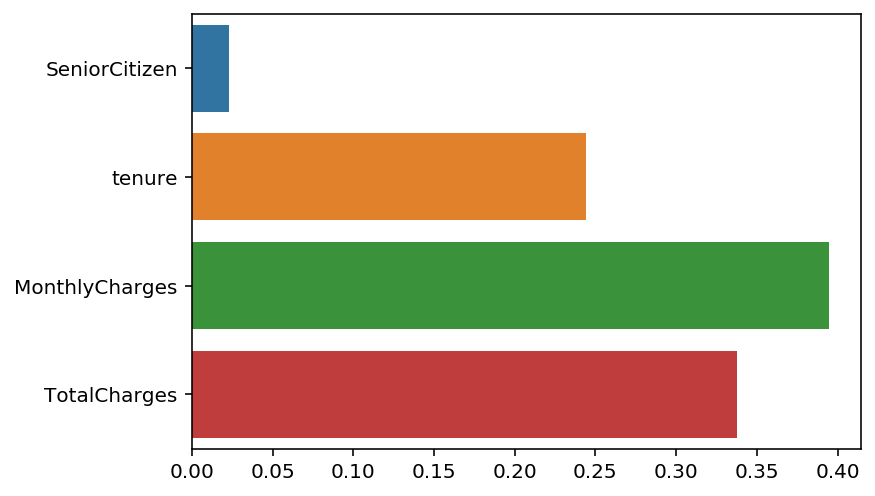

In [38]:
# 피처의 중요도 시각화 하기
sns.barplot(x = model.feature_importances_, y= feature_names)

### 점수 측정하기
#### Accuracy

In [39]:
# 모델이 얼마나 잘 예측했는지 측정해 봅니다.
# 시험을 보고 나서 몇 개 맞았는지 틀렸는지 채점해 보는 과정과 유사하다고 보면 됩니다.
# 실전 문제에서는 답이 없어서 우리가 예측을 해야겠지만 
# 이 실습은 정답이 있는 모의고사 입니다. 
# 모의고사를 보면 내 실력이 어느정도 되는지 예측해 볼 수 있듯이 점수를 측정해 봅니다.

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7128642501776831

In [40]:
# 정답과 같이 예측한 값은 True 로 나오게 됩니다. 
# True == 1 이기 때문에 평균값을 내면 정답을 맞춘 비율을 구할 수 있습니다.

(y_test == y_pred).mean()

0.7128642501776831

#### F1 score
* precision 과 recall의 조화평균
* [정밀도와 재현율 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EB%B0%80%EB%8F%84%EC%99%80_%EC%9E%AC%ED%98%84%EC%9C%A8)

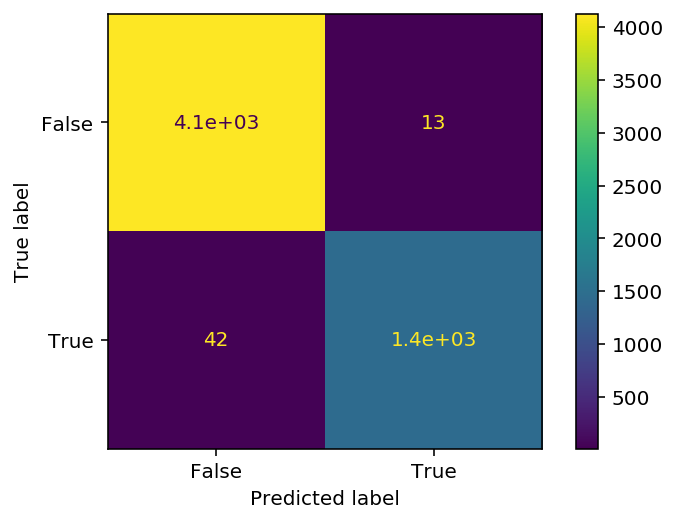

In [41]:
# plot_confusion_matrix 를 그립니다.
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_train, y_train)

In [ ]:
# 하지만 암환자를 예측한다든지 코로나 양성여부를 판단한다든지 할때는 
# 1000명 검사자 중에 한두 명만 양성일 수도 있습니다. 
# 이럴 때 1명의 양성은 찾지 못했지만 다른 사람들이 음성인 것을 맞게 예측했다면 정확한 모델이라고 보기 어렵습니다.

